In [2]:
import numpy as np
import matplotlib.pyplot as plt
from implicit_euler import implicit_euler
from explicit_euler import explicit_euler
from leapfrog import leapfrog
from trapezoidal import trapezoidal

In [3]:
f = lambda x: -x

k = .003
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y_implicit = implicit_euler(f,y,k,tol=1e-3)

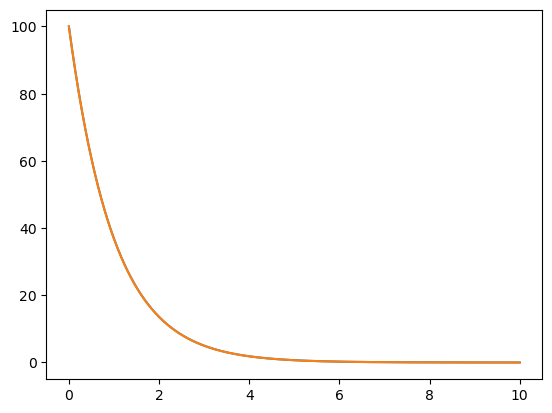

In [4]:
plt.plot(t,y_implicit)
plt.plot(t,100*np.exp(-t))

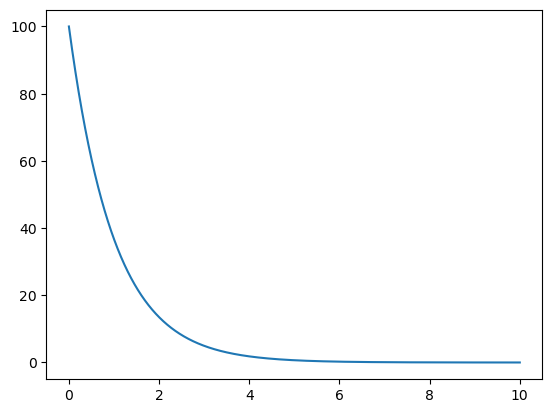

In [5]:
f = lambda x: -x

k = .003
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y_explicit = explicit_euler(f,y,k)
plt.plot(t,y_explicit)

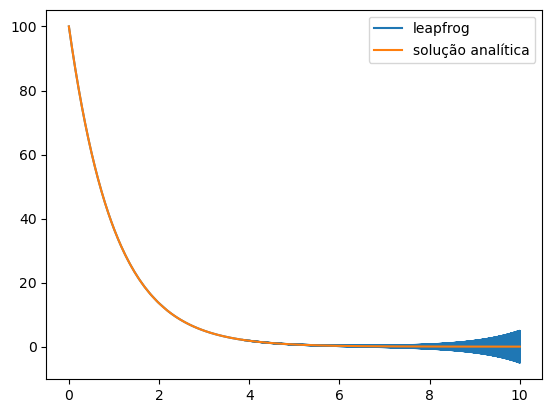

In [6]:
f = lambda x: -x

k = .003
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y_leapfrog = leapfrog(f,y,k)
plt.plot(t,y_leapfrog,label='leapfrog')
plt.plot(t,100*np.exp(-t),label='solução analítica')
plt.legend()

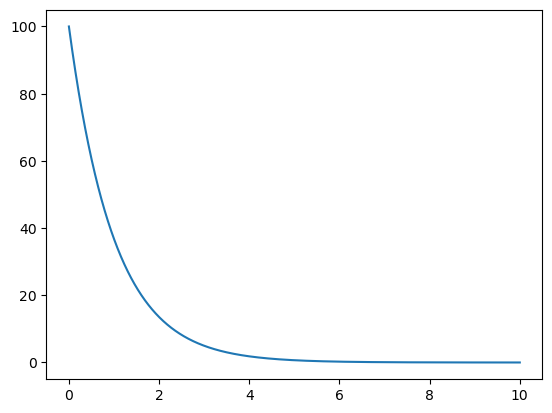

In [7]:
f = lambda x: -x

k = .003
t_final = 10
t = np.linspace(0,10,int(np.ceil(t_final/k)))
y = np.empty(t.shape,dtype=float)
y[0] = 100

y_trapezoidal = trapezoidal(f,y,k,tol=1e-3)
plt.plot(t,y_trapezoidal)

$$\frac{dy}{dt} = -y$$

$$\frac{dy}{y} = -dt$$

$$\int \frac{dy}{y} = -\int dt$$

$$\ln(y) = -t + C$$

$$y(t) = Ce^{-t}$$
$$ y(0) = 100$$

$$y(t) = 100e^{-t}$$

Agora, temos que obter as regiões de estabilidade absoluta. Para fazer isso, precisamos plotar o gráfico no plano complexo. Logo, $$z = |r|e^{i\theta}$$

onde $z$ é um número complexo, $\theta$ é um ângulo com sentido anti-horário no plano complexo.

O raio é dado pela seguinte relação para determinar a estabilidade absoluta do método

$$|r| = \left|\frac{y^{n+1}}{y^n}\right| \leq 1$$

Logo, $z$ será dado por: $$z = \left|\frac{y^{n+1}}{y^n}\right|e^{i\theta}$$

A maneira correta é fazer analítico, mas fiquei com preguiça

Começando pelo método explicito de Euler

In [8]:
theta = np.linspace(0,2*np.pi,1000)
z_explicit = np.abs(y_explicit[1]/y_explicit[0])*np.exp(theta*1j)

Text(0.5, 1.0, 'Região de estabilidade método de euler explicito')

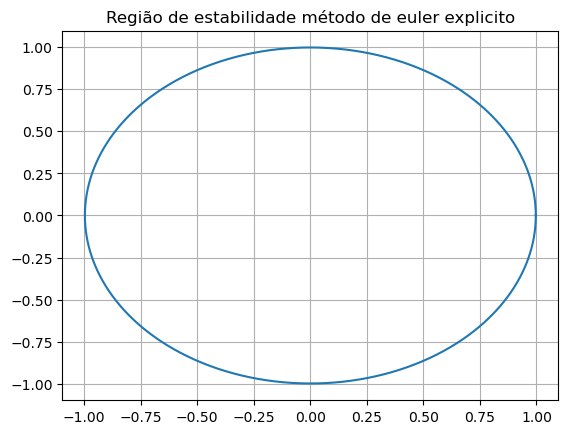

In [19]:
plt.plot(z_explicit.real,z_explicit.imag)
plt.grid()
plt.title("Região de estabilidade método de euler explicito")

Agora fazendo com o método implicito

Text(0.5, 1.0, 'Região de estabilidade método de euler implicito')

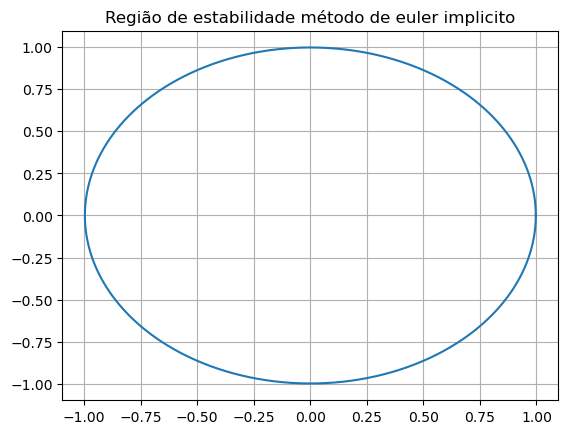

In [20]:
theta = np.linspace(0,2*np.pi,1000)
z_implicit = np.abs(y_implicit[1]/y_implicit[0])*np.exp(theta*1j)

plt.plot(z_implicit.real,z_implicit.imag)
plt.grid()
plt.title("Região de estabilidade método de euler implicito")

# Leapfrog

Text(0.5, 1.0, 'Região de estabilidade método leapfrog')

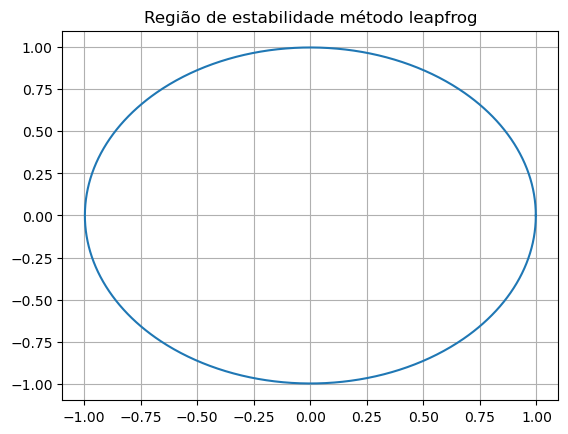

In [21]:
theta = np.linspace(0,2*np.pi,1000)
z_leapfrog = np.abs(y_leapfrog[2]/y_leapfrog[1])*np.exp(theta*1j)

plt.plot(z_leapfrog.real,z_leapfrog.imag)
plt.grid()
plt.title("Região de estabilidade método leapfrog")

# Trapezoidal

Text(0.5, 1.0, 'Região de estabilidade método trapezoidal')

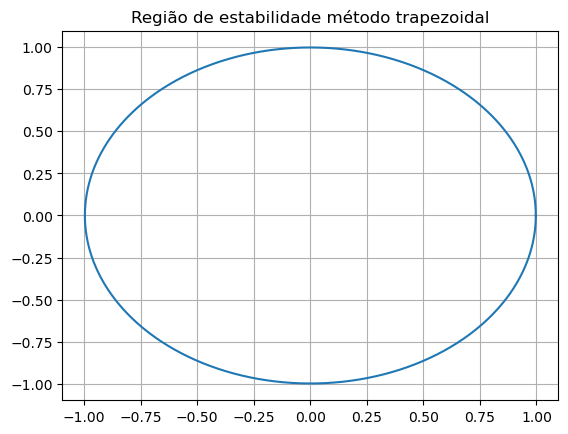

In [22]:
theta = np.linspace(0,2*np.pi,1000)
z_trapezoidal = np.abs(y_trapezoidal[2]/y_trapezoidal[1])*np.exp(theta*1j)

plt.plot(z_trapezoidal.real,z_trapezoidal.imag)
plt.grid()
plt.title("Região de estabilidade método trapezoidal")